# LOANS: TO LEND OR NOT TO LEND?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

loan = pd.read_csv('loan.csv')


#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 16,6


C:\Users\gtaus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [5]:
loan.shape

(887379, 74)

In [6]:
loan.isnull().sum()


id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

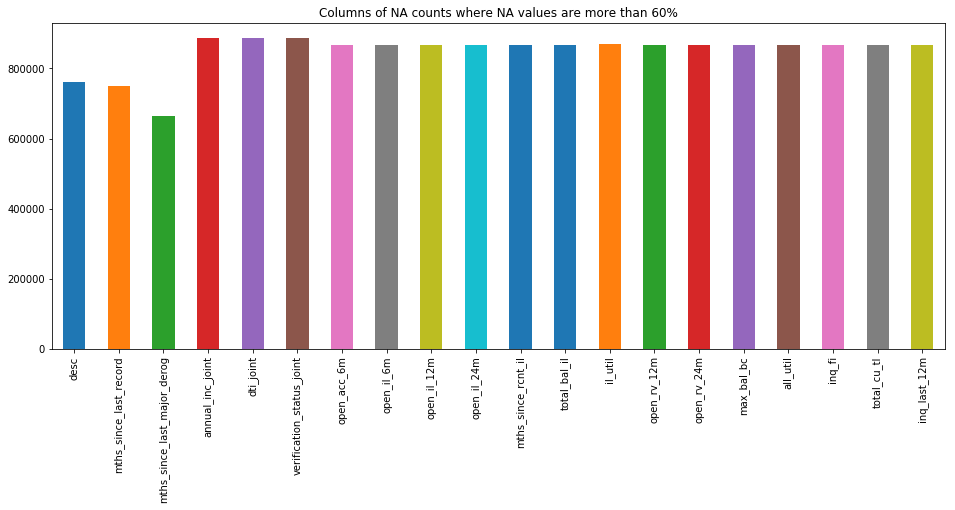

In [7]:
nan_col = loan.isnull().sum()
nan_col = nan_col[nan_col.values >(0.6*len(loan))]
plt.figure(figsize=(16,6))
nan_col.plot(kind='bar')
plt.title('Columns of NA counts where NA values are more than 60%')
plt.show()

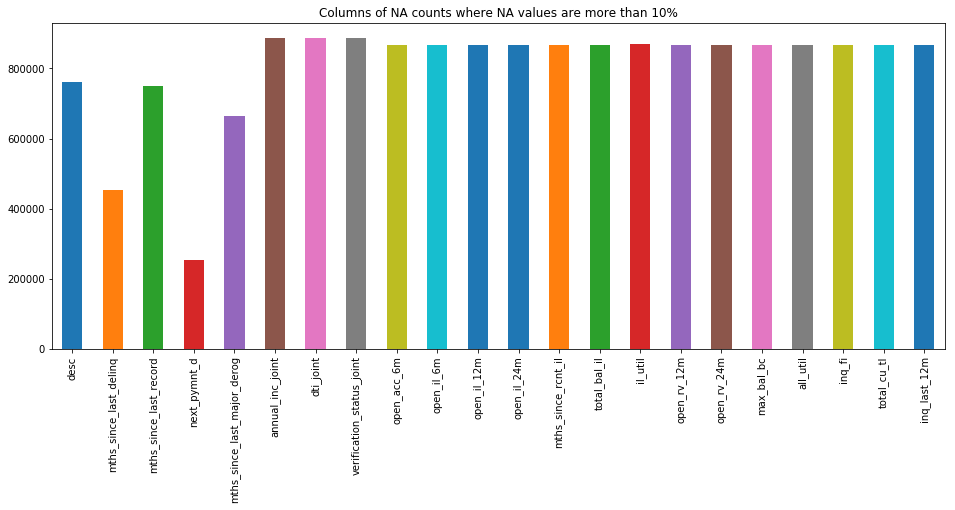

In [8]:
nan_col = loan.isnull().sum()
nan_col = nan_col[nan_col.values >(0.1*len(loan))]
plt.figure(figsize=(16,6))
nan_col.plot(kind='bar')
plt.title('Columns of NA counts where NA values are more than 10%')
plt.show()

In [9]:
loan.notnull().sum()

id                             887379
member_id                      887379
loan_amnt                      887379
funded_amnt                    887379
funded_amnt_inv                887379
term                           887379
int_rate                       887379
installment                    887379
grade                          887379
sub_grade                      887379
emp_title                      835917
emp_length                     842554
home_ownership                 887379
annual_inc                     887375
verification_status            887379
issue_d                        887379
loan_status                    887379
pymnt_plan                     887379
url                            887379
desc                           126028
purpose                        887379
title                          887227
zip_code                       887379
addr_state                     887379
dti                            887379
delinq_2yrs                    887350
earliest_cr_

In [10]:
loan.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

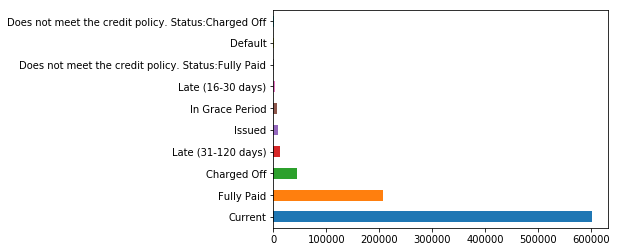

In [11]:
loan.loan_status.value_counts().plot(kind='barh')

In [12]:
loan.int_rate.describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

C:\Users\gtaus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Interest Rate')

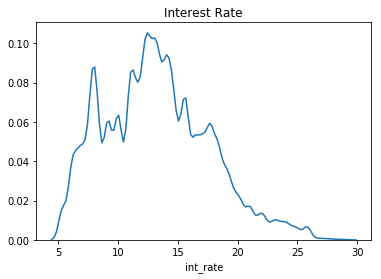

In [13]:
sns.distplot(loan['int_rate'],hist=False, bins=20);
plt.title("Interest Rate")

In [14]:
loan.loan_amnt.describe()


count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

C:\Users\gtaus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Loan Amount')

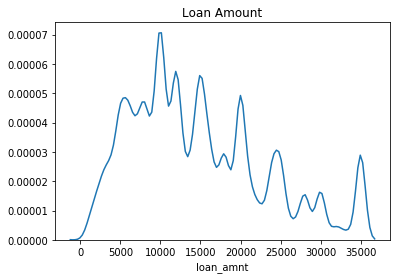

In [15]:
sns.distplot(loan['loan_amnt'],hist=False, bins=10);
plt.title("Loan Amount")

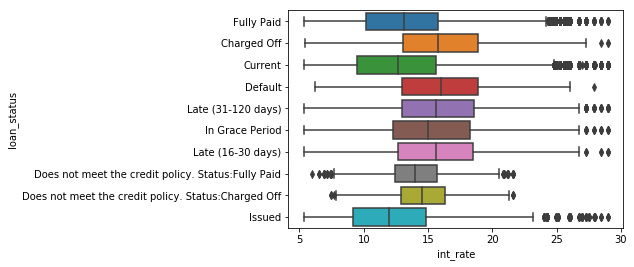

In [16]:
ax = sns.boxplot(x="int_rate", y="loan_status", data=loan)


In [17]:
loan.purpose.value_counts()

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

Text(0.5,1,'The Reason I Need This Loan?')

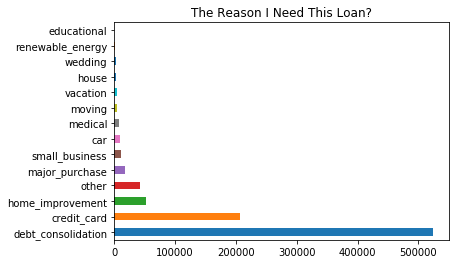

In [18]:
loan.purpose.value_counts().plot(kind='barh')
plt.title("The Reason I Need This Loan?")

Text(0.5,1,'Top 10 Titles Of Borrowers')

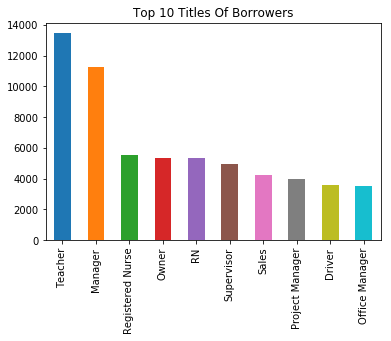

In [19]:
loan.emp_title.value_counts()[:10].plot(kind = 'bar')
plt.title("Top 10 Titles Of Borrowers")

In [20]:
loan.emp_title.value_counts("teacher")

Teacher                                     0.016113
Manager                                     0.013446
Registered Nurse                            0.006610
Owner                                       0.006431
RN                                          0.006406
Supervisor                                  0.005961
Sales                                       0.005039
Project Manager                             0.004771
Driver                                      0.004270
Office Manager                              0.004199
General Manager                             0.003802
Director                                    0.003775
manager                                     0.003754
teacher                                     0.003499
owner                                       0.003408
Engineer                                    0.003195
President                                   0.003108
driver                                      0.002906
Vice President                              0.

<Figure size 864x432 with 0 Axes>

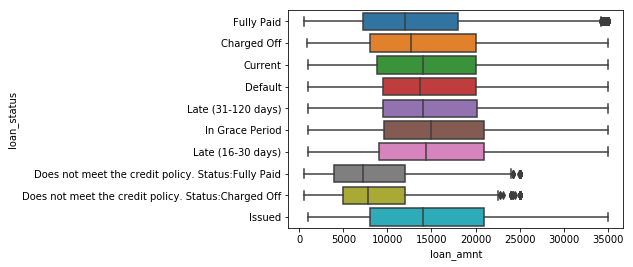

<Figure size 864x432 with 0 Axes>

In [21]:
ax= sns.boxplot(x="loan_amnt", y="loan_status", data=loan);
plt.figure(figsize=(12,6))


In [22]:
loan.addr_state.describe()

count     887379
unique        51
top           CA
freq      129517
Name: addr_state, dtype: object

In [23]:
address_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loan[address_loan[0]], loan[address_loan[1]]).style.background_gradient(cmap = cm)

loan_status,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
addr_state,,,,,,,,,,
AK,96,1469,2,1,4,567,15,14,6,31
AL,662,7576,9,8,24,2485,111,122,43,160
AR,337,4637,8,6,9,1417,57,70,13,86
AZ,1049,13577,39,18,33,5028,143,193,50,282
CA,7332,81851,211,101,223,35778,906,1147,327,1641
CO,784,12573,25,13,52,4829,106,166,57,202
CT,614,9353,8,12,50,3067,126,139,29,133
DC,87,1543,2,2,8,750,10,13,0,17
DE,121,1730,5,4,18,546,21,28,7,31
